# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : December 1st 2016

- update : December 3rd 2016

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [2]:
import pandas as pd

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [4]:
rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/HD14943"
object_name='HD14943'

In [5]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/mucol"
#object_name='mucol'
infos='ctioNov2016'

In [6]:
logfile='logbk_'+object_name+'_'+infos+'.fits'
pandaslogfile='logbk_'+object_name+'_'+infos+'.csv'

In [7]:
dirlist_all=os.listdir(rootpath_rawimage) 

In [8]:
dirlist_all.remove('.DS_Store') # reove that file in a mAC
dirlist_all

['2016_11_23T01_45_51',
 '2016_11_23T01_46_55',
 '2016_11_23T01_47_58',
 '2016_11_23T01_52_42',
 '2016_11_23T01_54_05',
 '2016_11_23T01_55_29',
 '2016_11_23T02_27_22',
 '2016_11_23T02_28_46',
 '2016_11_23T02_30_09',
 '2016_11_23T04_36_28',
 '2016_11_23T04_37_52',
 '2016_11_23T04_39_16',
 '2016_11_23T04_55_21',
 '2016_11_23T04_56_44',
 '2016_11_23T04_58_08',
 '2016_11_23T05_15_19',
 '2016_11_23T05_16_43',
 '2016_11_23T05_18_07',
 '2016_11_23T05_34_17',
 '2016_11_23T05_35_40',
 '2016_11_23T05_37_04',
 '2016_11_23T05_53_10',
 '2016_11_23T05_54_33',
 '2016_11_23T05_55_56',
 '2016_11_24T01_05_17',
 '2016_11_24T01_06_40',
 '2016_11_24T01_08_04',
 '2016_11_24T01_29_35',
 '2016_11_24T01_30_58',
 '2016_11_24T01_32_22',
 '2016_11_24T02_54_15',
 '2016_11_24T02_55_38',
 '2016_11_24T02_57_01',
 '2016_11_24T03_14_59',
 '2016_11_24T03_16_23',
 '2016_11_24T03_17_46',
 '2016_11_24T04_38_18',
 '2016_11_24T04_39_41',
 '2016_11_24T04_41_05',
 '2016_11_24T04_58_54',
 '2016_11_24T05_00_17',
 '2016_11_24T05_

In [9]:
index=0
indexes_files= []
filelist_fitsimages= []
for dir in dirlist_all: # loop on directories, one per image       
        dir_leaf= rootpath_rawimage+'/'+dir # build the name of leaf directory
        listfiles=os.listdir(dir_leaf) 
        for filename in listfiles:
            if re.search('^calibrated.*fits.gz$',filename):  #example of filename filter
                index=index+1
                shortfilename=dir_leaf+'/'+filename
                filelist_fitsimages.append(shortfilename)
                indexes_files.append(index)

### Build tables for output file

In [10]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []

for idx,file in np.ndenumerate(filelist_fitsimages):   
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)

    hdu_list.close()
    

## Build outputfile

In [11]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(dirlist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)


In [12]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=col_filename)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 


In [13]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12])

In [14]:
tbhdu.writeto(logfile,clobber=True)

## Convert into Table
---------------------------

In [15]:
thetable= Table(tbhdu.data)

In [16]:
thetable.show_in_notebook()

idx,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
0,1,1.101,2016-11-23T01:45:29.665,2016_11_23T01_45_51,20.0,24.718,9.0,776.0,64.0,5.4,1.522
1,2,1.1,2016-11-23T01:46:33.179,2016_11_23T01_46_55,20.0,24.613,9.0,776.0,64.0,6.6,1.371
2,3,1.099,2016-11-23T01:47:36.699,2016_11_23T01_47_58,20.0,24.509,9.0,776.0,64.0,7.8,1.399
3,4,1.095,2016-11-23T01:52:00.166,2016_11_23T01_52_42,40.0,24.09,8.9,776.0,64.0,5.0,1.357
4,5,1.094,2016-11-23T01:53:23.679,2016_11_23T01_54_05,40.0,23.961,8.9,776.0,64.0,4.5,1.304
5,6,1.093,2016-11-23T01:54:47.200,2016_11_23T01_55_29,40.0,23.834,9.0,776.0,64.0,6.0,1.409
6,7,1.075,2016-11-23T02:26:40.568,2016_11_23T02_27_22,40.0,21.588,8.7,776.0,66.0,7.8,1.713
7,8,1.075,2016-11-23T02:28:04.083,2016_11_23T02_28_46,40.0,21.523,8.7,776.0,66.0,10.0,2.03
8,9,1.074,2016-11-23T02:29:27.596,2016_11_23T02_30_09,40.0,21.459,8.7,776.0,66.0,9.5,2.288
9,10,1.131,2016-11-23T04:35:46.919,2016_11_23T04_36_28,40.0,27.84,6.8,775.0,73.0,9.4,2.213


## Read the logfile into a Table
---------------------------------------

In [17]:
t = Table.read(logfile)

In [18]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32
1,1.101,2016-11-23T01:45:29.665,2016_11_23T01_45_51,20.0,24.718,9.0,776.0,64.0,5.4,1.522
2,1.1,2016-11-23T01:46:33.179,2016_11_23T01_46_55,20.0,24.613,9.0,776.0,64.0,6.6,1.371
3,1.099,2016-11-23T01:47:36.699,2016_11_23T01_47_58,20.0,24.509,9.0,776.0,64.0,7.8,1.399
4,1.095,2016-11-23T01:52:00.166,2016_11_23T01_52_42,40.0,24.09,8.9,776.0,64.0,5.0,1.357
5,1.094,2016-11-23T01:53:23.679,2016_11_23T01_54_05,40.0,23.961,8.9,776.0,64.0,4.5,1.304
6,1.093,2016-11-23T01:54:47.200,2016_11_23T01_55_29,40.0,23.834,9.0,776.0,64.0,6.0,1.409
7,1.075,2016-11-23T02:26:40.568,2016_11_23T02_27_22,40.0,21.588,8.7,776.0,66.0,7.8,1.713
8,1.075,2016-11-23T02:28:04.083,2016_11_23T02_28_46,40.0,21.523,8.7,776.0,66.0,10.0,2.03
9,1.074,2016-11-23T02:29:27.596,2016_11_23T02_30_09,40.0,21.459,8.7,776.0,66.0,9.5,2.288


## Convert into pandas to plot
---------------------------------------

In [19]:
df = t.to_pandas()

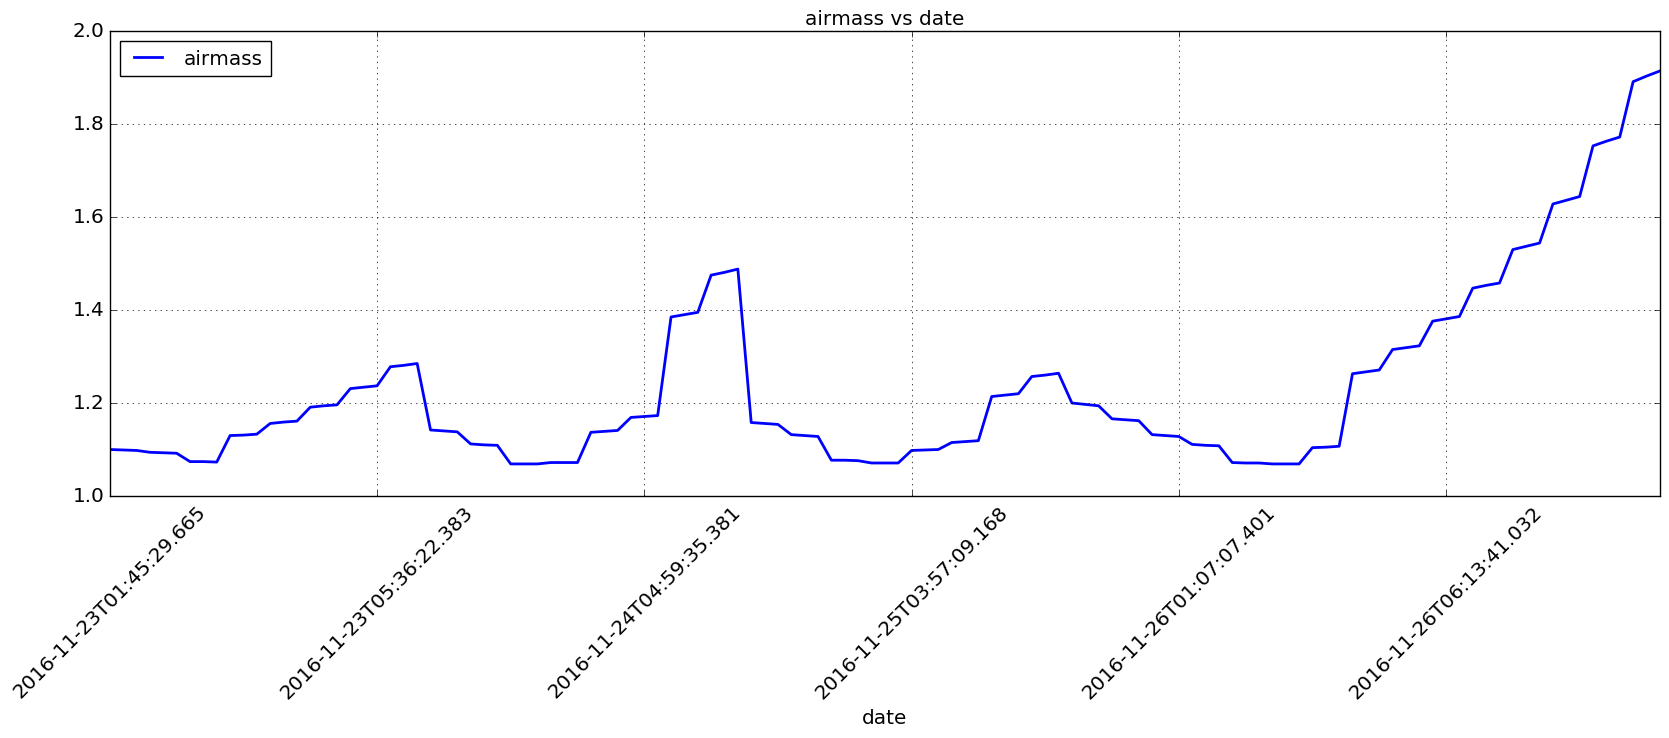

In [20]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',linewidth=2)


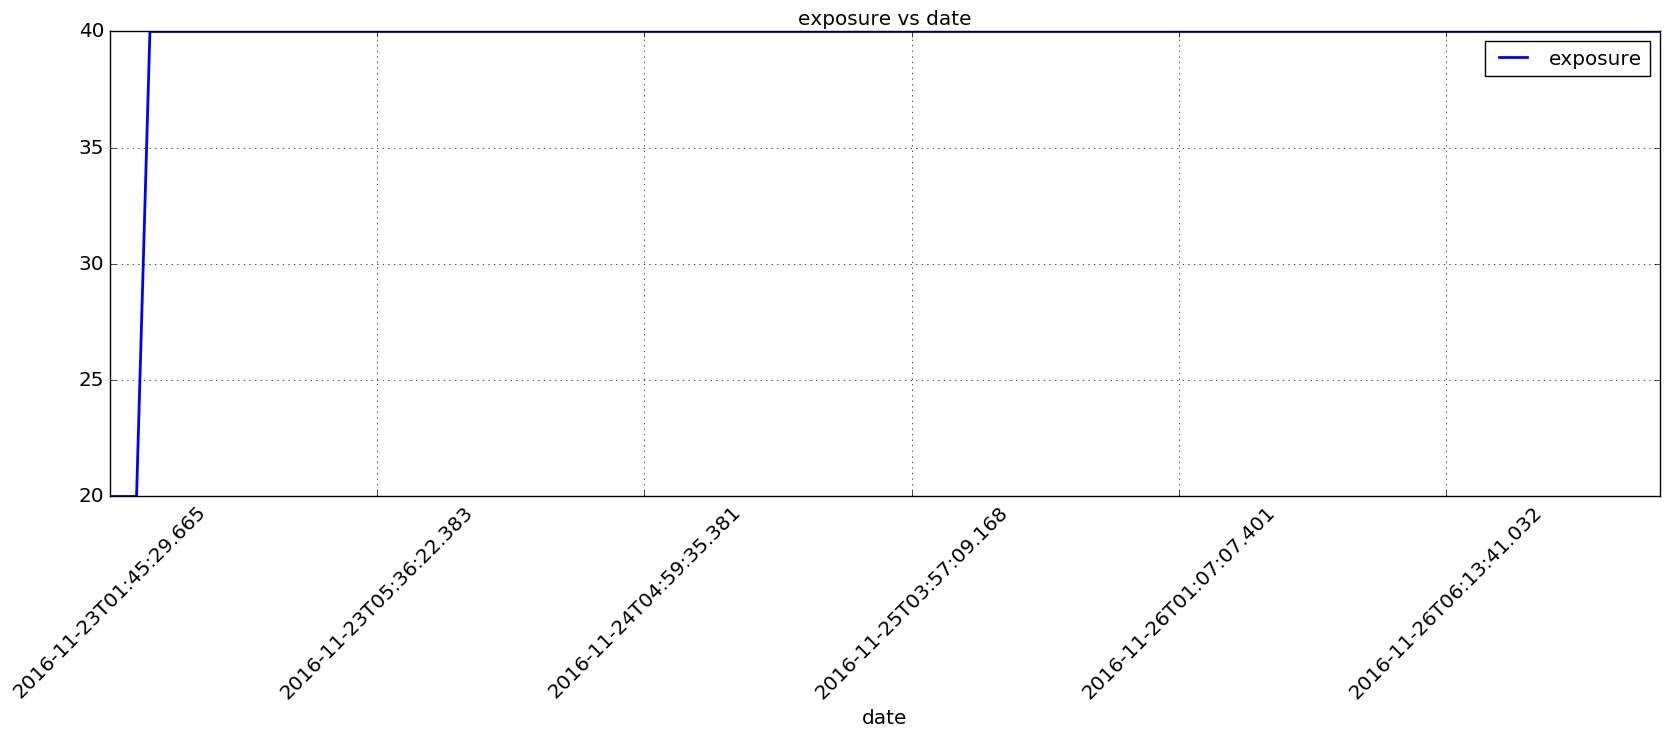

In [21]:
df.plot('date','exposure',figsize=(20,6),rot=45,grid=True,title='exposure vs date',color='b',linewidth=2)

### Save pandas file


In [22]:
df.to_csv(pandaslogfile)